# 1. 데이터셋 소개
* 흉부 횡단면에 대한 단층(CT)이미지에 대한 데이터셋
* RGB 채널 횡단면 단층 이미지와 폐, 기도, 심장에 대한 마스크 이미지
* 촬영인 112명에 대한 데이터셋 16708장
* 촬영인 수를 기준으로 학습/검증 비율을 9:1 분리

In [1]:
!pip install pandas

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
data_dir = './MEDICAL-DATASET/'
data_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
data_df.head()

ImageId                                MaskId
0  ID00007637202177411956430_0.jpg  ID00007637202177411956430_mask_0.jpg
1  ID00007637202177411956430_1.jpg  ID00007637202177411956430_mask_1.jpg
2  ID00007637202177411956430_2.jpg  ID00007637202177411956430_mask_2.jpg
3  ID00007637202177411956430_3.jpg  ID00007637202177411956430_mask_3.jpg
4  ID00007637202177411956430_4.jpg  ID00007637202177411956430_mask_4.jpg

In [4]:
data_df.shape

(16708, 2)

In [5]:
data_df.head(50)

ImageId                                 MaskId
0    ID00007637202177411956430_0.jpg   ID00007637202177411956430_mask_0.jpg
1    ID00007637202177411956430_1.jpg   ID00007637202177411956430_mask_1.jpg
2    ID00007637202177411956430_2.jpg   ID00007637202177411956430_mask_2.jpg
3    ID00007637202177411956430_3.jpg   ID00007637202177411956430_mask_3.jpg
4    ID00007637202177411956430_4.jpg   ID00007637202177411956430_mask_4.jpg
5    ID00007637202177411956430_5.jpg   ID00007637202177411956430_mask_5.jpg
6    ID00007637202177411956430_6.jpg   ID00007637202177411956430_mask_6.jpg
7    ID00007637202177411956430_7.jpg   ID00007637202177411956430_mask_7.jpg
8    ID00007637202177411956430_8.jpg   ID00007637202177411956430_mask_8.jpg
9    ID00007637202177411956430_9.jpg   ID00007637202177411956430_mask_9.jpg
10  ID00007637202177411956430_10.jpg  ID00007637202177411956430_mask_10.jpg
11  ID00007637202177411956430_11.jpg  ID00007637202177411956430_mask_11.jpg
12  ID00007637202177411956430_12.jpg  ID00007637202177411956430_mask_12.jpg
13  ID00007637202177411956430_13.jpg  ID00007637202177411956430_mask_13.jpg
14  ID00007637202177411956430_14.jpg  ID00007637202177411956430_mask_14.jpg
15  ID00007637202177411956430_15.jpg  ID00007637202177411956430_mask_15.jpg
16  ID00007637202177411956430_16.jpg  ID00007637202177411956430_mask_16.jpg
17  ID00007637202177411956430_17.jpg  ID00007637202177411956430_mask_17.jpg
18  ID00007637202177411956430_18.jpg  ID00007637202177411956430_mask_18.jpg
19  ID00007637202177411956430_19.jpg  ID00007637202177411956430_mask_19.jpg
20  ID00007637202177411956430_20.jpg  ID00007637202177411956430_mask_20.jpg
21  ID00007637202177411956430_21.jpg  ID00007637202177411956430_mask_21.jpg
22  ID00007637202177411956430_22.jpg  ID00007637202177411956430_mask_22.jpg
23  ID00007637202177411956430_23.jpg  ID00007637202177411956430_mask_23.jpg
24  ID00007637202177411956430_24.jpg  ID00007637202177411956430_mask_24.jpg
25  ID00007637202177411956430_25.jpg  ID00007637202177411956430_mask_25.jpg
26  ID00007637202177411956430_26.jpg  ID00007637202177411956430_mask_26.jpg
27  ID00007637202177411956430_27.jpg  ID00007637202177411956430_mask_27.jpg
28  ID00007637202177411956430_28.jpg  ID00007637202177411956430_mask_28.jpg
29  ID00007637202177411956430_29.jpg  ID00007637202177411956430_mask_29.jpg
30   ID00009637202177434476278_0.jpg   ID00009637202177434476278_mask_0.jpg
31   ID00009637202177434476278_1.jpg   ID00009637202177434476278_mask_1.jpg
32   ID00009637202177434476278_2.jpg   ID00009637202177434476278_mask_2.jpg
33   ID00009637202177434476278_3.jpg   ID00009637202177434476278_mask_3.jpg
34   ID00009637202177434476278_4.jpg   ID00009637202177434476278_mask_4.jpg
35   ID00009637202177434476278_5.jpg   ID00009637202177434476278_mask_5.jpg
36   ID00009637202177434476278_6.jpg   ID00009637202177434476278_mask_6.jpg
37   ID00009637202177434476278_7.jpg   ID00009637202177434476278_mask_7.jpg
38   ID00009637202177434476278_8.jpg   ID00009637202177434476278_mask_8.jpg
39   ID00009637202177434476278_9.jpg   ID00009637202177434476278_mask_9.jpg
40  ID00009637202177434476278_10.jpg  ID00009637202177434476278_mask_10.jpg
41  ID00009637202177434476278_11.jpg  ID00009637202177434476278_mask_11.jpg
42  ID00009637202177434476278_12.jpg  ID00009637202177434476278_mask_12.jpg
43  ID00009637202177434476278_13.jpg  ID00009637202177434476278_mask_13.jpg
44  ID00009637202177434476278_14.jpg  ID00009637202177434476278_mask_14.jpg
45  ID00009637202177434476278_15.jpg  ID00009637202177434476278_mask_15.jpg
46  ID00009637202177434476278_16.jpg  ID00009637202177434476278_mask_16.jpg
47  ID00009637202177434476278_17.jpg  ID00009637202177434476278_mask_17.jpg
48  ID00009637202177434476278_18.jpg  ID00009637202177434476278_mask_18.jpg
49  ID00009637202177434476278_19.jpg  ID00009637202177434476278_mask_19.jpg

In [6]:
data_df['id'] = data_df.ImageId.apply(lambda x: x.split('_')[0])

In [7]:
data_df

ImageId  \
0        ID00007637202177411956430_0.jpg   
1        ID00007637202177411956430_1.jpg   
2        ID00007637202177411956430_2.jpg   
3        ID00007637202177411956430_3.jpg   
4        ID00007637202177411956430_4.jpg   
...                                  ...   
16703  ID00426637202313170790466_403.jpg   
16704  ID00426637202313170790466_404.jpg   
16705  ID00426637202313170790466_405.jpg   
16706  ID00426637202313170790466_406.jpg   
16707  ID00426637202313170790466_407.jpg   

                                       MaskId                         id  
0        ID00007637202177411956430_mask_0.jpg  ID00007637202177411956430  
1        ID00007637202177411956430_mask_1.jpg  ID00007637202177411956430  
2        ID00007637202177411956430_mask_2.jpg  ID00007637202177411956430  
3        ID00007637202177411956430_mask_3.jpg  ID00007637202177411956430  
4        ID00007637202177411956430_mask_4.jpg  ID00007637202177411956430  
...                                       ...                        ...  
16703  ID00426637202313170790466_mask_403.jpg  ID00426637202313170790466  
16704  ID00426637202313170790466_mask_404.jpg  ID00426637202313170790466  
16705  ID00426637202313170790466_mask_405.jpg  ID00426637202313170790466  
16706  ID00426637202313170790466_mask_406.jpg  ID00426637202313170790466  
16707  ID00426637202313170790466_mask_407.jpg  ID00426637202313170790466  

[16708 rows x 3 columns]

In [8]:
# 총 112개의 id만 저장
client_ids = np.unique(data_df.id.values)
print(len(client_ids))

112


In [9]:
client_ids

array(['ID00007637202177411956430', 'ID00009637202177434476278',
       'ID00010637202177584971671', 'ID00012637202177665765362',
       'ID00014637202177757139317', 'ID00015637202177877247924',
       'ID00019637202178323708467', 'ID00025637202179541264076',
       'ID00027637202179689871102', 'ID00032637202181710233084',
       'ID00035637202182204917484', 'ID00047637202184938901501',
       'ID00048637202185016727717', 'ID00051637202185848464638',
       'ID00060637202187965290703', 'ID00061637202188184085559',
       'ID00068637202190879923934', 'ID00072637202198161894406',
       'ID00073637202198167792918', 'ID00075637202198610425520',
       'ID00076637202199015035026', 'ID00077637202199102000916',
       'ID00082637202201836229724', 'ID00089637202204675567570',
       'ID00090637202204766623410', 'ID00094637202205333947361',
       'ID00102637202206574119190', 'ID00104637202208063407045',
       'ID00105637202208831864134', 'ID00109637202210454292264',
       'ID001106372022106

In [10]:
!pip install opencv_python

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
# client_ids에서 index가 0인 ImageId와 MaskId를 출력
index = 0
client_data = data_df[data_df.id == client_ids[index]][['ImageId', 'MaskId']]

In [13]:
client_data

ImageId                                 MaskId
0    ID00007637202177411956430_0.jpg   ID00007637202177411956430_mask_0.jpg
1    ID00007637202177411956430_1.jpg   ID00007637202177411956430_mask_1.jpg
2    ID00007637202177411956430_2.jpg   ID00007637202177411956430_mask_2.jpg
3    ID00007637202177411956430_3.jpg   ID00007637202177411956430_mask_3.jpg
4    ID00007637202177411956430_4.jpg   ID00007637202177411956430_mask_4.jpg
5    ID00007637202177411956430_5.jpg   ID00007637202177411956430_mask_5.jpg
6    ID00007637202177411956430_6.jpg   ID00007637202177411956430_mask_6.jpg
7    ID00007637202177411956430_7.jpg   ID00007637202177411956430_mask_7.jpg
8    ID00007637202177411956430_8.jpg   ID00007637202177411956430_mask_8.jpg
9    ID00007637202177411956430_9.jpg   ID00007637202177411956430_mask_9.jpg
10  ID00007637202177411956430_10.jpg  ID00007637202177411956430_mask_10.jpg
11  ID00007637202177411956430_11.jpg  ID00007637202177411956430_mask_11.jpg
12  ID00007637202177411956430_12.jpg  ID00007637202177411956430_mask_12.jpg
13  ID00007637202177411956430_13.jpg  ID00007637202177411956430_mask_13.jpg
14  ID00007637202177411956430_14.jpg  ID00007637202177411956430_mask_14.jpg
15  ID00007637202177411956430_15.jpg  ID00007637202177411956430_mask_15.jpg
16  ID00007637202177411956430_16.jpg  ID00007637202177411956430_mask_16.jpg
17  ID00007637202177411956430_17.jpg  ID00007637202177411956430_mask_17.jpg
18  ID00007637202177411956430_18.jpg  ID00007637202177411956430_mask_18.jpg
19  ID00007637202177411956430_19.jpg  ID00007637202177411956430_mask_19.jpg
20  ID00007637202177411956430_20.jpg  ID00007637202177411956430_mask_20.jpg
21  ID00007637202177411956430_21.jpg  ID00007637202177411956430_mask_21.jpg
22  ID00007637202177411956430_22.jpg  ID00007637202177411956430_mask_22.jpg
23  ID00007637202177411956430_23.jpg  ID00007637202177411956430_mask_23.jpg
24  ID00007637202177411956430_24.jpg  ID00007637202177411956430_mask_24.jpg
25  ID00007637202177411956430_25.jpg  ID00007637202177411956430_mask_25.jpg
26  ID00007637202177411956430_26.jpg  ID00007637202177411956430_mask_26.jpg
27  ID00007637202177411956430_27.jpg  ID00007637202177411956430_mask_27.jpg
28  ID00007637202177411956430_28.jpg  ID00007637202177411956430_mask_28.jpg
29  ID00007637202177411956430_29.jpg  ID00007637202177411956430_mask_29.jpg

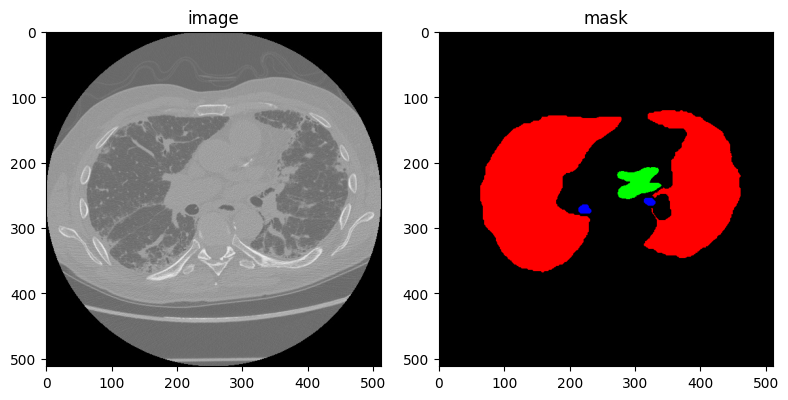

In [14]:
sub_index = 15
img_name, mask_name = client_data.iloc[sub_index].values
# print(img_name, mask_name)
img_path, mask_path = os.path.join(data_dir, 'images', img_name), os.path.join(data_dir, 'masks', mask_name)
# print(img_path, mask_path)
image = cv2.imread(img_path)
mask = cv2.imread(mask_path)

thres = 240
mask[mask < thres] = 0
mask[mask >= thres] = 255

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.title('image')
plt.imshow(image)

plt.subplot(122)
plt.title('mask')
plt.imshow(mask)
plt.tight_layout()

In [15]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [16]:
mask.shape

(512, 512, 3)

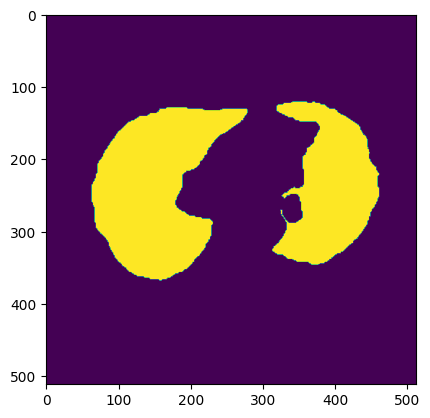

In [17]:
plt.imshow(mask[..., 0])

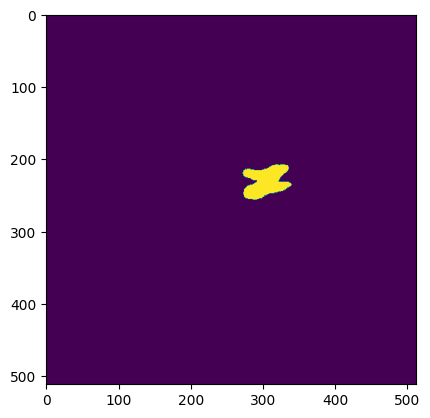

In [18]:
plt.imshow(mask[..., 1])

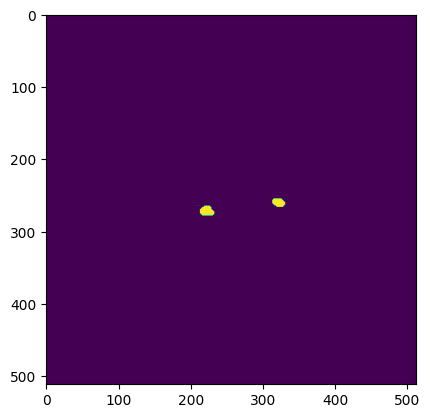

In [19]:
plt.imshow(mask[..., 2])

In [20]:
def get_client_data(data_df, index):
    client_ids = np.unique(data_df.id.values)
    client_id = client_ids[index]
    client_data = data_df[data_df.id == client_id]
    image_files = list(client_data['ImageId'])
    mask_files = list(client_data['MaskId'])
    return client_id, image_files, mask_files

In [21]:
regions = ['background', 'trachea', 'heart', 'lung']
colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]

In [22]:
index = 1
client_id, image_files, mask_files = get_client_data(data_df, index)
# print(client_id, image_files, mask_files)

canvas = np.zeros(shape=(512, 2*512+50, 3), dtype=np.uint8)

for i in range(len(image_files)):
    image = cv2.imread(os.path.join(data_dir, 'images', image_files[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(os.path.join(data_dir, 'masks', mask_files[i]))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    thres = 240
    mask[mask < thres] = 0
    mask[mask >= thres] = 255
    grid_pad = 50
    
    canvas[:, :512, :] = image
    canvas[:, 512+grid_pad:2*512+grid_pad, :] = mask
    
    text_buff = 410
    for j in range(1, len(regions)):
        cv2.putText(canvas, f'{regions[j].upper()}', 
                    (900, text_buff), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[j], 2)
        text_buff += 40
    cv2.imshow('CT frames', canvas)
    key = cv2.waitKey(60)
    if key == 27:
        break

In [23]:
print(client_id)

ID00009637202177434476278


# 2. 데이터셋 구축과 텐서변환 모듈 작성하기

In [24]:
import torch

In [25]:
IMAGE_SIZE = 224

In [26]:
class CT_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.phase = phase
        self.image_dir = os.path.join(data_dir, phase, 'images')
        self.mask_dir = os.path.join(data_dir, phase, 'masks')
        self.image_files = [filename for filename in os.listdir(self.image_dir) if filename.endswith('.jpg')]
        self.mask_files = [filename for filename in os.listdir(self.mask_dir) if filename.endswith('.jpg')]
        self.transformer = transformer
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        image = cv2.imread(os.path.join(self.image_dir, self.image_files[index]))
        image = cv2.resize(image, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_LINEAR)
        mask = cv2.imread(os.path.join(self.mask_dir, self.mask_files[index]))
        mask = cv2.resize(mask, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        mask[mask < 240] = 0
        mask[mask >= 240] = 255
        mask = mask / 255 #  0 ~ 1
        
        mask_H, mask_W, mask_C = mask.shape
        background = np.ones(shape=(mask_H, mask_W))
        background[mask[...,0] != 0] = 0
        background[mask[...,1] != 0] = 0
        background[mask[...,2] != 0] = 0
        
        mask = np.concatenate([np.expand_dims(background, -1), mask], axis=-1)
        mask = np.argmax(mask, axis=-1)
        
        if self.transformer:
            image = self.transformer(image)
        
        target = torch.from_numpy(mask).long()
        return image, target

### 2-1. concatenate
* 배열 합치기

In [27]:
x = np.arange(9).reshape(3, 3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [28]:
y = x * 10
print(y)

[[ 0 10 20]
 [30 40 50]
 [60 70 80]]


In [29]:
np.concatenate((x, y), axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 0, 10, 20],
       [30, 40, 50],
       [60, 70, 80]])

In [30]:
np.concatenate((x, y), axis=1)

array([[ 0,  1,  2,  0, 10, 20],
       [ 3,  4,  5, 30, 40, 50],
       [ 6,  7,  8, 60, 70, 80]])

In [31]:
np.concatenate((x, y), axis=-1)

array([[ 0,  1,  2,  0, 10, 20],
       [ 3,  4,  5, 30, 40, 50],
       [ 6,  7,  8, 60, 70, 80]])

### 2-2. expand_dims
* 차원을 추가

In [32]:
x = np.array([10, 3])
print(x)
print(x.shape)

[10  3]
(2,)


In [33]:
y = np.expand_dims(x, axis=0)
print(y.shape)

(1, 2)


In [34]:
y = x[np.newaxis, :]
print(x)
print(y)
print(y.shape)

[10  3]
[[10  3]]
(1, 2)


In [35]:
y = np.expand_dims(x, axis=1)
print(y)
print(y.shape)

[[10]
 [ 3]]
(2, 1)


In [36]:
y = x[:, np.newaxis]
print(x)
print(y)
print(y.shape)

[10  3]
[[10]
 [ 3]]
(2, 1)


In [37]:
from torchvision import transforms

In [38]:
# 많은 Vision 모델들의 전처리에 사용된 ImageNet 데이터셋의 학습시에 얻어낸 값
# ImageNet 데이터셋은 좋은 이미지들을 다량 포함하고 있기 때문에 데이터셋에서 얻어낸 값이라면 
# 어떤 이미지 데이터셋에서도 잘 작동할 것이라는 가정하에 이 값들을 기본값으로 세팅해서 사용
# https://pytorch.org/vision/stable/models/generated/torchvision.models.alexnet.html?highlight=normalize

def build_transformer():
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transformer

In [39]:
def collate_fn(batch):
    images = []
    targets = []
    for a, b in batch:
        images.append(a)
        targets.append(b)
    images = torch.stack(images, dim=0)
    targets = torch.stack(targets, dim=0)
    return images, targets    

In [40]:
data_dir = './MEDICAL-DATASET/'
transformer = build_transformer()
dset = CT_dataset(data_dir, 'train', transformer)

In [41]:
image, target = dset[0]
print(f'image shape: {image.shape}')
print(f'masks shape: {target.shape}')

image shape: torch.Size([3, 224, 224])
masks shape: torch.Size([224, 224])


In [42]:
from torch.utils.data import DataLoader

In [43]:
dloader = DataLoader(dset, batch_size=4, shuffle=True, collate_fn=collate_fn)

In [44]:
for index, batch in enumerate(dloader):
    images = batch[0]
    targets = batch[1]
    print(f'images shape: {images.shape}')
    print(f'masks shape: {targets.shape}')
    if index == 0:
        break 

images shape: torch.Size([4, 3, 224, 224])
masks shape: torch.Size([4, 224, 224])


In [45]:
def build_dataloader(data_dir, batch_size=4):
    transformer = build_transformer()
    dataloaders = {}
    train_dataset = CT_dataset(data_dir=data_dir, phase='train', transformer=transformer)
    dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    
    val_dataset = CT_dataset(data_dir=data_dir, phase='val', transformer=transformer)
    dataloaders['val'] = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    return dataloaders

# 3. U-Net 데이터 아키텍처 구현하기
* [U-Net](https://miro.medium.com/max/4800/1*f7YOaE4TWubwaFF7Z1fzNw.png)
* Biomedical 분야를 위해 만들어진 FCN 기반의 모델
* 오토인코더(autoencoder)와 디코더(decoder)기반 모델
* 인코딩 단계에서는 입력 이미지의 특징을 포착할 수 있도록 채널의 수를 늘리면서 차원을 축소
* 디코딩 단계에서는 저차원으로 인코딩된 정보만을 이용하여 채널의 수를 줄이고 차원을 늘려서 고차원의 이미지를 복원

In [46]:
import torch
import torch.nn as nn

In [47]:
def ConvLayer(in_channels, out_channels):
    layers = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    )
    return layers

In [48]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = ConvLayer(in_channels=3, out_channels=64)
        self.conv_block2 = ConvLayer(in_channels=64, out_channels=128)
        self.conv_block3 = ConvLayer(in_channels=128, out_channels=256)
        self.conv_block4 = ConvLayer(in_channels=256, out_channels=512)
        self.conv_block5 = ConvLayer(in_channels=512, out_channels=1024)
        self.pool = nn.MaxPool2d(kernel_size=2)
        
    def forward(self, x):
        encode_features = []
        out = self.conv_block1(x)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block2(out)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block3(out)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block4(out)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block5(out)
        return out, encode_features

In [49]:
encoder = Encoder()
x = torch.randn(1, 3, 224, 224)
# print(x)
out, ftrs = encoder(x)
# print(out)
# print(ftrs)

In [50]:
for ftr in ftrs:
    print(ftr.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])


In [51]:
print(out.shape)

torch.Size([1, 1024, 14, 14])


In [52]:
def UpConvLayer(in_channels, out_channels):
    layers = nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )
    return layers

In [53]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.upconv_layer1 = UpConvLayer(in_channels=1024, out_channels=512)
        self.conv_block1 = ConvLayer(in_channels=1024, out_channels=512)
        
        self.upconv_layer2 = UpConvLayer(in_channels=512, out_channels=256)
        self.conv_block2 = ConvLayer(in_channels=512, out_channels=256)

        self.upconv_layer3 = UpConvLayer(in_channels=256, out_channels=128)
        self.conv_block3 = ConvLayer(in_channels=256, out_channels=128)
        
        self.upconv_layer4 = UpConvLayer(in_channels=128, out_channels=64)
        self.conv_block4 = ConvLayer(in_channels=128, out_channels=64)
    
    
    def forward(self, x, encode_features):
        out = self.upconv_layer1(x)
        croped_enc_feature = self._center_crop(encode_features[-1], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block1(out)
        
        out = self.upconv_layer2(out)
        croped_enc_feature = self._center_crop(encode_features[-2], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block2(out)

        out = self.upconv_layer3(out)
        croped_enc_feature = self._center_crop(encode_features[-3], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block3(out)

        out = self.upconv_layer4(out)
        croped_enc_feature = self._center_crop(encode_features[-4], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block4(out)
        return out
    
    
    def _center_crop(self, encoder_feature, decoder_feature_size):
        croped_features = transforms.CenterCrop(size=decoder_feature_size)(encoder_feature)
        return croped_features

### 3-1. transforms.CenterCrop
* 이미지 가운데 부분을 자르기
* transforms.CenterCrop(size=(가로, 세로))(이미지)

# 4. UNet 모델 작성해보기

In [54]:
import torch.nn.functional as F

In [55]:
class UNet(nn.Module):
    def __init__(self, num_classes, retain_input_dim=True):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.head = nn.Conv2d(64, num_classes, kernel_size=1)
        self.retain_input_dim = retain_input_dim
    
    def forward(self, x):
        out, encode_features = self.encoder(x)
        out = self.decoder(out, encode_features)
        out = self.head(out)
        if self.retain_input_dim:
            _, _, H, W = x.shape
            out = F.interpolate(out, size=(H, W)) # 적은 feature의 크기를 변경시킬 때 사용
        return out

In [56]:
model = UNet(num_classes=4)
x = torch.randn(1, 3, 224, 224)
out = model(x)
print(f'Input shape: {x.shape}')
print(f'Output shape: {out.shape}')

Input shape: torch.Size([1, 3, 224, 224])
Output shape: torch.Size([1, 4, 224, 224])


# 5. Dice Similarity coefficient 설명 및 구현하기
* Segmentation에서 가장 많이 쓰이는 지표
* F1 Score(binary 계산)와 개념상 같지만 영상처리에서 더 많이 사용함
* 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
* 영상 이미지 등에서 정답과 예측값 간의 차이를 알기 위해 사용
* 라벨링된 영역과 예측한 영역이 정확히 일치 한다면 1이되며, 그렇지 않은 경우에는 0에 가까워짐

In [57]:
data_dir = './MEDICAL-DATASET/'
transformer = build_transformer()
tr_dataset = CT_dataset(data_dir=data_dir, phase='train', transformer=transformer)
val_dataset = CT_dataset(data_dir=data_dir, phase='val', transformer=transformer)
tr_dataloader = DataLoader(tr_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)

In [58]:
# 데이터로더에서 데이터를 1개 받아와 예측값을 구함
for index, batch in enumerate(tr_dataloader):
    image = batch[0]
    targets = batch[1]
    predictions = model(image)
    
    if index == 0:
        break 

In [59]:
targets.shape

torch.Size([4, 224, 224])

In [60]:
predictions.shape

torch.Size([4, 4, 224, 224])

In [61]:
num_classes = 4
predictions_ = torch.argmax(predictions, dim=1)
onehot_pred = F.one_hot(predictions_, num_classes=num_classes).permute(0, 3, 1, 2)
onehot_target = F.one_hot(targets, num_classes=num_classes).permute(0, 3, 1, 2)

In [62]:
onehot_pred_ = onehot_pred[0]
onehot_target_ = onehot_target[0]

dice_coeff = 0
for class_index in range(1, num_classes):
    a = onehot_pred_[class_index]
    b = onehot_target_[class_index]
    set_inter = torch.dot(a.reshape(-1).float(), b.reshape(-1).float())
    set_sum = a.sum() + b.sum()
    dice_coeff += (2*set_inter) / (set_sum+1e-8)
dice_coeff /= (num_classes-1)

In [63]:
dice_coeff

tensor(0.)

In [64]:
dice_loss = 1. - dice_coeff

In [65]:
dice_loss

tensor(1.)

In [66]:
class UNet_metric():
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.CE_loss = nn.CrossEntropyLoss(reduction='mean')
    
    def __call__(self, pred, target):
        loss1 = self.CE_loss(pred, target)
        onehot_pred = F.one_hot(torch.argmax(pred, dim=1), num_classes=num_classes).permute(0, 3, 1, 2) 
        onehot_target = F.one_hot(target, num_classes=num_classes).permute(0, 3, 1, 2)
        loss2 = self._get_dice_loss(onehot_pred, onehot_target)
        loss = loss1 + loss2
        dice_coefficient = self._get_batch_dice_coefficient(onehot_pred, onehot_target)
        return loss, dice_coefficient
    
    def _get_dice_coefficient(self, pred, target):
        set_inter = torch.dot(pred.reshape(-1).float(), target.reshape(-1).float())
        set_sum = pred.sum() + target.sum()
        if set_sum.item() == 0:
            set_sum = 2 * set_inter
        dice_coeff = (2 * set_inter) / (set_sum + 1e-9)
        return dice_coeff
        
    def _get_multiclass_dice_coefficient(self, pred, target):
        dice = 0
        for class_index in range(1, self.num_classes):
            dice += self._get_dice_coefficient(pred[class_index], target[class_index])
        return dice / (self.num_classes - 1)       
    
    
    def _get_batch_dice_coefficient(self, pred, target):
        num_batch = pred.shape[0]
        dice = 0
        for batch_index in range(num_batch):
            dice += self._get_multiclass_dice_coefficient(pred[batch_index], target[batch_index])
            return dice / num_batch
    
    def _get_dice_loss(self, pred, target):
        return 1 - self._get_batch_dice_coefficient(pred, target)

In [67]:
criterion = UNet_metric(4)
criterion(predictions, targets)

(tensor(2.5964, grad_fn=<AddBackward0>), tensor(0.))

In [68]:
optimizer = torch.optim.SGD(model.parameters(), lr=1E-3, momentum=0.9)

In [69]:
optimizer.step()

In [70]:
for index, batch in enumerate(tr_dataloader):
    images = batch[0]
    targets = batch[1]
    predictions = model(images)
    
    if index == 0:
        break

In [71]:
images.shape

torch.Size([4, 3, 224, 224])

In [72]:
targets.shape

torch.Size([4, 224, 224])

In [73]:
predictions.shape

torch.Size([4, 4, 224, 224])

In [74]:
def train_one_epoch(dataloaders, model, optimizer, criterion, device):
    losses = {}
    dice_coefficients = {}
    
    for phase in ['train', 'val']:
        running_loss = 0.0
        running_dice_coeff = 0.0
        
        if phase == 'train':
            model.train()
        else:
            model.eval()
        
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0].to(device)
            targets = batch[1].to(device)
            
            with torch.set_grad_enabled(phase == 'train'):
                predictions = model(images)
                loss, dice_coefficient = criterion(predictions, targets)
            
            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            running_loss += loss.item()
            running_dice_coeff += dice_coefficient.item()
            
            if phase == 'train':
                if index > 0 and index % 100 == 0:
                    text = f'{index}/{len(dataloaders[phase])}' + \
                        f' - Running Loss: {loss.item():.4f}' + \
                        f' - Running Dice: {dice_coefficient.item():.4f}'
                    print(text)
        losses[phase] = running_loss / len(dataloaders[phase])
        dice_coefficients[phase] = running_dice_coeff / len(dataloaders[phase])
    return losses, dice_coefficients

In [75]:
def save_model(model_state, model_name, save_dir='./trained_model'):
    os.makedirs(save_dir, exist_ok=True)
    torch.save(model_state, os.path.join(save_dir, model_name))

In [76]:
data_dir = './MEDICAL-DATASET/'

NUM_CLASSES = 4
IMAGE_SIZE = 224
BATCH_SIZE = 12
DEVICE = 'cpu'

dataloaders = build_dataloader(data_dir, batch_size=BATCH_SIZE)
model = UNet(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
criterion = UNet_metric(num_classes=NUM_CLASSES)
optimizer = torch.optim.SGD(model.parameters(), lr=1E-3, momentum=0.9)

In [77]:
num_epochs = 10
best_epoch = 0
best_score = 0.0
train_loss, train_dice_coefficient = [], []
val_loss, val_dice_coefficient = [], []

for epoch in range(num_epochs):
    losses, dice_coefficients = train_one_epoch(dataloaders, model, optimizer, criterion, DEVICE)
    train_loss.append(losses['train'])
    val_loss.append(losses['val'])
    train_dice_coefficient.append(dice_coefficients['train'])
    val_dice_coefficient.append(dice_coefficients['val'])
    
    print(f"{epoch}/{num_epochs} - Train Loss:{losses['train']:.4f}, Val Loss:{losses['val']:.4f}")
    print(f"{epoch}/{num_epochs} - Train Dice Coeff:{dice_coefficients['train']:.4f}, Val Dice Coeff:{dice_coefficients['Val']:.4f}")
    
    if (epoch > 3) and (dice_coefficients['val'] > best_score):
        best_epoch = epoch
        best_score = dice_coefficients['val']
        save_model(model.state_dict(), f'model_{epoch:02d}.pth')
        
print(f'Best epoch:{best_epoch} -> Best Dice Coefficient:{best_score:.4f}')

KeyboardInterrupt: 

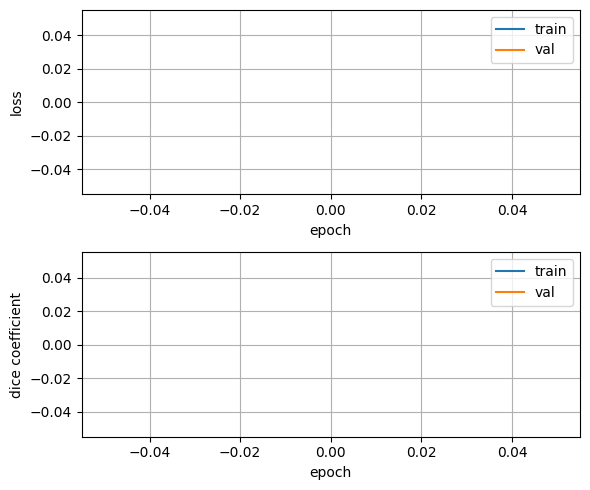

In [78]:
plt.figure(figsize=(6, 5))
plt.subplot(211)
plt.plot(train_loss, label="train")
plt.plot(val_loss,  label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid("on")
plt.legend()
plt.subplot(212)
plt.plot(train_dice_coefficient, label="train")
plt.plot(val_dice_coefficient, label="val")
plt.xlabel("epoch")
plt.ylabel("dice coefficient")
plt.grid("on")
plt.legend()
plt.tight_layout()

# 6. 모델 테스트 및 filtering 적용하기

In [79]:
def load_model(ckpt_path, num_classes, device):
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = UNet(num_classes=num_classes)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()
    return model

In [80]:
NUM_CLASSES = 4
IMAGE_SIZE = 224
# is_cuda = True
# DEVICE = torch.device('cuda' if torch.cuda.is_availalbe and is_cuda else 'cpu')
DEVICE = 'cpu'

In [81]:
ckpt_path = './trained_model/model_05.pth'
model = load_model(ckpt_path, NUM_CLASSES, DEVICE)

transformer = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [82]:
# 모폴로지 필터링 후처리 기법
# 클로징을 이용해서 주변을 토대로 내부의 노이즈를 채움
def morpholocal_process(mask, num_classes, ksize=7):
    new_mask = mask.copy()
    # 커널의 구조 요소를 생성. size에 None을 설정하면 기본값으로 3*3 사각형 요소를 생성
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))
    
    for class_index in range(1, num_classes):
        binary_mask = (mask == class_index).astype(np.uint8)
        closing = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
        new_mask[closing.astype(np.bool_)] = class_index
    return new_mask

In [83]:
CLASS_ID_TO_RGB = {
    0: (0, 0, 0),
    1: (255, 0, 0),
    2: (0, 255, 0),
    3: (0, 0, 255)
}

In [84]:
def decode_segmap(mask, num_classes):
    mask_H, mask_W = mask.shape
    R_channel = np.zeros((mask_H, mask_W), dtype=np.uint8)
    G_channel = np.zeros((mask_H, mask_W), dtype=np.uint8)
    B_channel = np.zeros((mask_H, mask_W), dtype=np.uint8)
    
    for class_index in range(1, num_classes):
        R_channel[mask == class_index] = CLASS_ID_TO_RGB[class_index][0]
        G_channel[mask == class_index] = CLASS_ID_TO_RGB[class_index][1]
        B_channel[mask == class_index] = CLASS_ID_TO_RGB[class_index][2]
    
    RGB_mask = cv2.merge((B_channel, G_channel, R_channel))
    return RGB_mask

In [85]:
# 영상위에 오버레이
from PIL import Image

@torch.no_grad()
def predict_segment(image, model, num_classes, device):
    PIL_image = Image.fromarray(image)
    tensor_image = transformer(PIL_image)
    tensor_image = tensor_image.to(device) # (C, H, W)
    # unsqueeze: 배치형태로 만들기 위해 첫번째 차원을 늘림
    pred_mask = model(torch.unsqueeze(tensor_image, dim=0)) # (B, C, H, W)
    pred_mask = torch.argmax(pred_mask.squeeze(0).cpu(), dim=0)
    pred_mask = pred_mask.numpy()
    pred_mask = morpholocal_process(pred_mask, num_classes)
    rgb_mask = decode_segmap(pred_mask, num_classes)
    return rgb_mask

In [86]:
video_path = 'C:/project/2_medical/video/test/ID00392637202302319160044.mp4'
cnt = 0
cap = cv2.VideoCapture(video_path)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        rgb_mask = predict_segment(frame, model, NUM_CLASSES, DEVICE)
        rgb_mask = cv2.resize(rgb_mask, dsize=(frame.shape[1], frame.shape[0]))
        
        alpha = 0.6
        blend = cv2.addWeighted(frame, alpha, rgb_mask, 1-alpha, 0)
        cv2.imshow('output', blend)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
        if key == ord('s'):
            cv2.waitKey(0)
    else:
        break

cap.release()